# 5.2. Examples

### Utility Code

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def isnan(object):
    """Check if an object is not a matplotlib number."""
    return not isinstance(object, str) and np.isnan(object)


def load_csv_data(path: str):
    """Load CSV data."""
    # Load data from CSV file
    if not os.path.isfile(path):
        raise Exception("This path does not exist.")
    data = pd.read_csv(path)
    data["FINAL CAPACITY"] = data["FINAL CAPACITY"] / 1000
    return data


def mark_link_selection(data: pd.DataFrame, color, ax):
    """Mark locations where the target link has been switched or lost."""
    link_area = (
        list()
    )  # list of start and end frame pairs (where a link has been found.)
    prevLink = np.nan
    start_empty = data["FRAME"].iloc[0]
    end_empty = data["FRAME"].iloc[-1]
    currentLink = np.nan

    first_label = True

    for index, row in data.iterrows():
        currentLink = row["TARGET LINK"]
        if isnan(currentLink) and isnan(prevLink):
            continue

        # Place a vertical line if a switch occured.
        if currentLink != prevLink:
            if isnan(currentLink):
                ax.axvline(
                    x=row["FRAME"],
                    color=color,
                    linestyle="--",
                    linewidth=1,
                    alpha=1,
                    label="Target Link Change" if first_label else "",
                )
                start_empty = data["FRAME"].iloc[index]
                link_area.append((end_empty, start_empty))
                first_label = False
            elif isnan(prevLink):
                end_empty = data["FRAME"].iloc[index]
            else:
                ax.axvline(
                    x=row["FRAME"],
                    color=color,
                    linestyle="--",
                    linewidth=1,
                    alpha=1,
                    label="Target Link Change" if first_label else "",
                )
                first_label = False

            prevLink = currentLink

    if not isnan(currentLink):
        link_area.append((end_empty, data["FRAME"].iloc[-1]))

    return link_area


def plot_data(data: pd.DataFrame, color, ax, link_area: list, title: str):
    for start_area, end_area in link_area:
        sns.lineplot(
            x=data["FRAME"][start_area:end_area],
            y=data["FINAL CAPACITY"][start_area:end_area],
            color=color,
            # marker=".",
            label=title,
            ax=ax,
        )


def get_title(path: str):
    title = os.path.splitext(path.split("/")[-1].split("_")[-1])[0]
    match (title):
        case "East":
            title = "Eastwards"
        case "West":
            title = "Westwards"
        case "North":
            title = "Northwards"
        case "South":
            title = "Southwards"
        case _:
            title = "Any"
    return title


def graph(paths: list[str], output: str):
    sns.set_theme(
        style="whitegrid",
        rc={
            "font.sans-serif": ["Times New Roman"],
            "font.size": 18,
            "figure.figsize": (10, 6),
        },
    )

    fig, axs = plt.subplots(2, 2, figsize=(10, 6))
    axs = axs.flatten()

    # Iterate over the paths and plot the data in different subplots
    for i, path in enumerate(paths):
        data = load_csv_data(path)
        color = sns.color_palette("tab10")[i]  # Get the color for the current plot
        title = get_title(path)
        link_area = mark_link_selection(data, color, axs[i])
        plot_data(data, color, axs[i], link_area, title)

    # Set labels and limits for each subplot
    for ax in axs:
        ax.set_xlabel("Number of Snapshots")
        ax.set_ylabel("Final Capacity (Gbp/snapshot)")
        # ax.set_ylim(-500, 20500)
        ax.set_ylim(-0.5, 20.5)
        ax.tick_params(axis="y", labelcolor="black")
        ax.grid(True)

        # Check if there are lines in the ax
        if len(ax.get_lines()) == 0:
            # Remove the ax from the plot
            fig.delaxes(ax)
            # fig.delaxes(axs.flatten()[idx])

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    if not output.endswith(".svg"):
        raise Exception("This file needs to have a .svg extension.")
    plt.savefig(output)

## Geographic Cases

### Landlocked

Exception: This path does not exist.

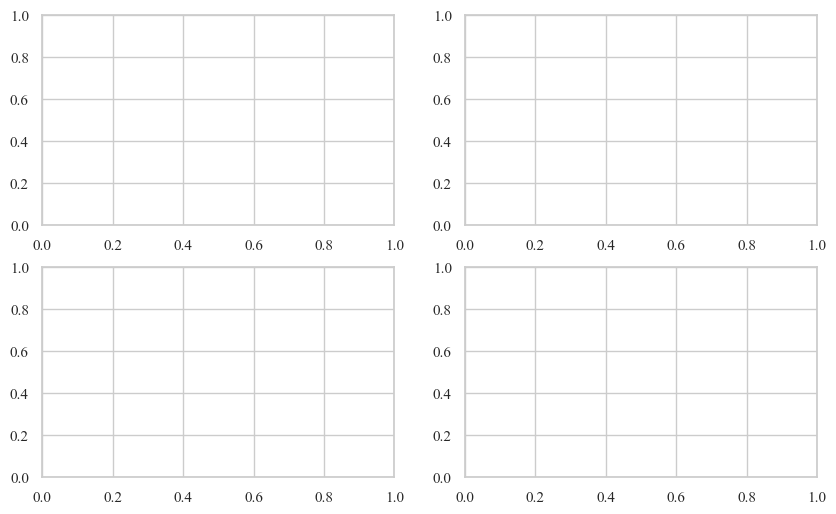

In [2]:
paths = list()
paths.append("./Logs/Captures/Landlocked_East/Landlocked_East.csv")
paths.append("./Logs/Captures/Landlocked_West/Landlocked_West.csv")
paths.append("./Logs/Captures/Landlocked_North/Landlocked_North.csv")
paths.append("./Logs/Captures/Landlocked_South/Landlocked_South.csv")
graph(paths, "./Logs/Captures/Landlocked.svg")

### Coastal

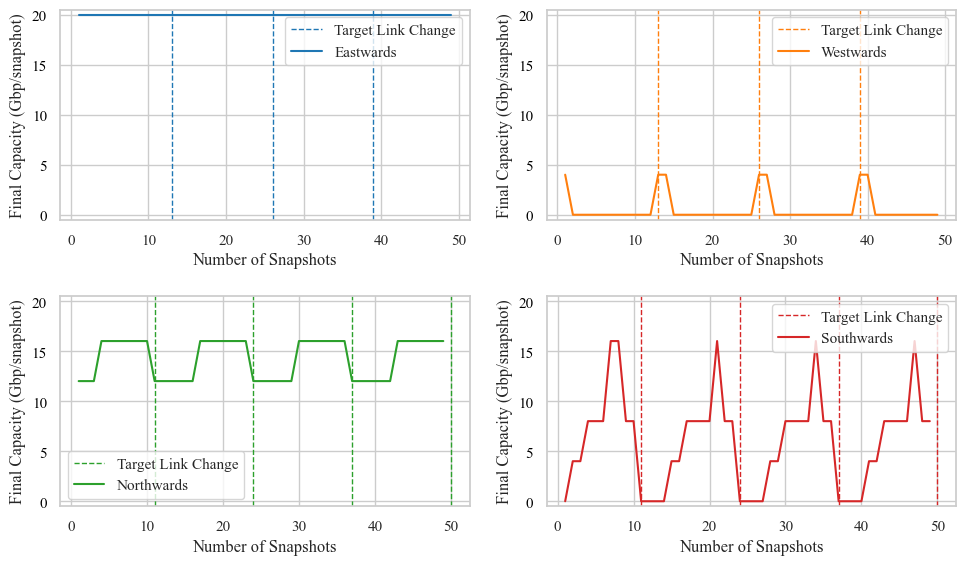

In [ ]:
paths = list()
paths.append("./Logs/Captures/Coastal_East/Coastal_East.csv")
paths.append("./Logs/Captures/Coastal_West/Coastal_West.csv")
paths.append("./Logs/Captures/Coastal_North/Coastal_North.csv")
paths.append("./Logs/Captures/Coastal_South/Coastal_South.csv")
graph(paths, "./Logs/Captures/Coastal.svg")

### Insular

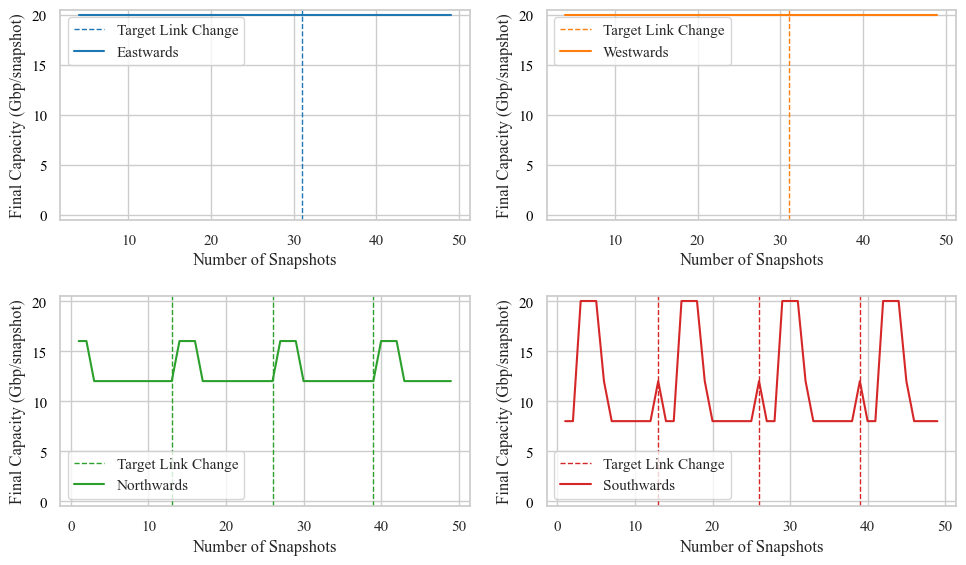

In [ ]:
paths = list()
paths.append("./Logs/Captures/Insular_East/Insular_East.csv")
paths.append("./Logs/Captures/Insular_West/Insular_West.csv")
paths.append("./Logs/Captures/Insular_North/Insular_North.csv")
paths.append("./Logs/Captures/Insular_South/Insular_South.csv")
graph(paths, "./Logs/Captures/Insular.svg")

## Latitudinal

### Polar

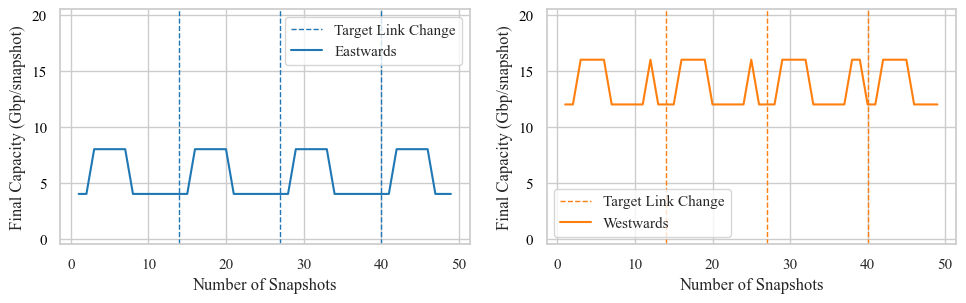

In [ ]:
paths = list()
paths.append("./Logs/Captures/Polar_East/Polar_East.csv")
paths.append("./Logs/Captures/Polar_West/Polar_West.csv")
paths.append("./Logs/Captures/Polar_North/Polar_North.csv")
paths.append("./Logs/Captures/Polar_South/Polar_South.csv")
graph(paths, "./Logs/Captures/Polar.svg")

### Equatorial

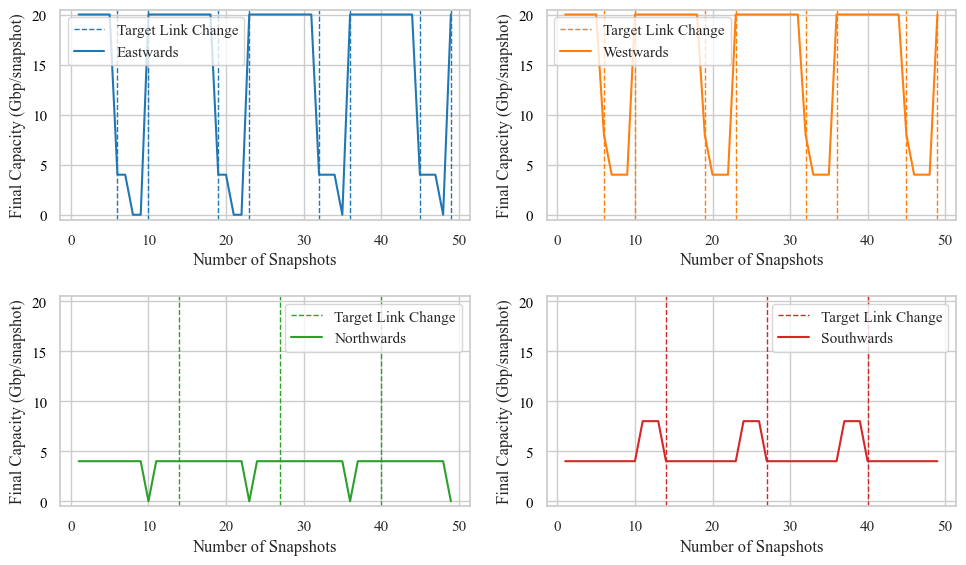

In [ ]:
paths = list()
paths.append("./Logs/Captures/Equatorial_East/Equatorial_East.csv")
paths.append("./Logs/Captures/Equatorial_West/Equatorial_West.csv")
paths.append("./Logs/Captures/Equatorial_North/Equatorial_North.csv")
paths.append("./Logs/Captures/Equatorial_South/Equatorial_South.csv")
graph(paths, "./Logs/Captures/Equatorial.svg")

## Orbital

### Intraorbital

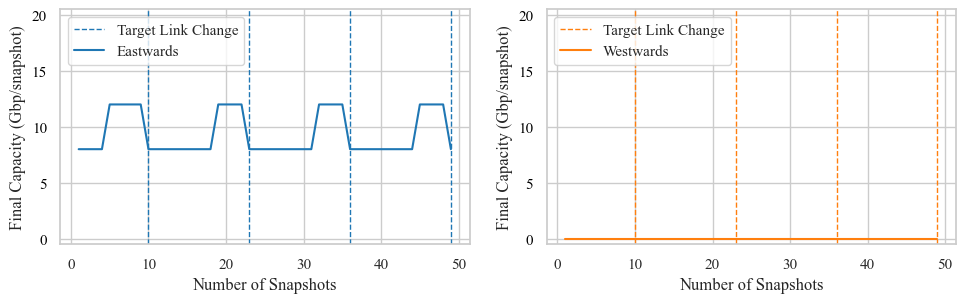

In [ ]:
paths = list()
paths.append("./Logs/Captures/IntraOrbital_East/IntraOrbital_East.csv")
paths.append("./Logs/Captures/IntraOrbital_West/IntraOrbital_West.csv")
paths.append("./Logs/Captures/IntraOrbital_North/IntraOrbital_North.csv")
paths.append("./Logs/Captures/IntraOrbital_South/IntraOrbital_South.csv")
graph(paths, "./Logs/Captures/IntraOrbital.svg")

### Transorbital

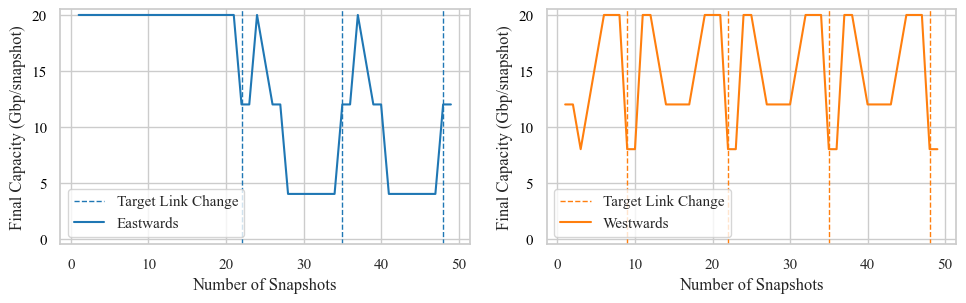

In [ ]:
paths = list()
paths.append("./Logs/Captures/TransOrbital_East/TransOrbital_East.csv")
paths.append("./Logs/Captures/TransOrbital_West/TransOrbital_West.csv")
paths.append("./Logs/Captures/TransOrbital_North/TransOrbital_North.csv")
paths.append("./Logs/Captures/TransOrbital_South/TransOrbital_South.csv")
graph(paths, "./Logs/Captures/TransOrbital.svg")